In [1]:
# MNIST and CIFAR10 are toy datasets
# need to work with jpg and png formats
# need PREPROCESSING of images like aspect ratios, scaling, normalization, 
# and then transform to tensor

# we can perform a variety of TRANSFORMATION to the dataset so no need to collect more images

In [ ]:
# methods of transformation: resize, crop, flip (horizontal/vertical), rotate

### Image files directory tree
<pre>.
└── Data
    └── CATS_DOGS
        ├── test
        │   ├── CAT
        │   │   ├── 9374.jpg
        │   │   ├── 9375.jpg
        │   │   └── ... (3,126 files)
        │   └── DOG
        │       ├── 9374.jpg
        │       ├── 9375.jpg
        │       └── ... (3,125 files)       
        │           
        └── train
            ├── CAT
            │   ├── 0.jpg
            │   ├── 1.jpg
            │   └── ... (9,371 files)
            └── DOG
                ├── 0.jpg
                ├── 1.jpg
                └── ... (9,372 files)</pre>

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import seaborn as sn  # for heatmaps
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import os
from PIL import Image
from IPython.display import display # just for notebook

import warnings
warnings.filterwarnings("ignore")

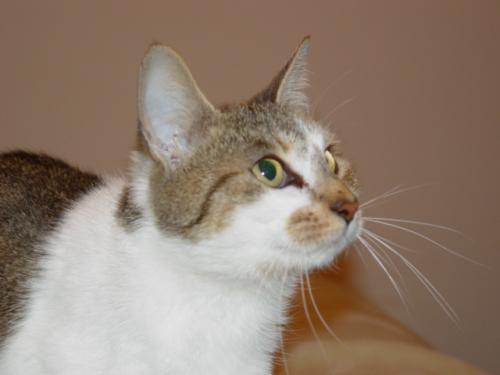

In [11]:
# display a single image

# check the full file path
with Image.open("../Data/CATS_DOGS/CATS_DOGS/test/CAT/10104.jpg") as im:
    display(im)

In [12]:
# read the folder; pics are complex
path = "../Data/CATS_DOGS/CATS_DOGS/"
img_names = []

for folder, subfolders,filenames in os.walk(path):
    for img in filenames:
        img_names.append(folder+"/"+img)

In [13]:
len(img_names)

24994

In [14]:
img_sizes = []
rejected = []

for item in img_names:
    try:
        with Image.open(item) as img:
            img_sizes.append(img.size)
    
    except:
        rejected.append(item)

In [18]:
print(len(img_sizes))
print(len(rejected))

24994
0


In [19]:
df = pd.DataFrame(img_sizes)

In [20]:
df.head() #0 - width; 1- height

,0,1
0,431,360
1,500,375
2,500,471
3,500,375
4,320,240


In [21]:
df[0].describe() #stats of width

count    24994.000000
mean       404.493518
std        108.941802
min         42.000000
25%        323.000000
50%        448.000000
75%        500.000000
max        500.000000
Name: 0, dtype: float64

In [22]:
df[1].describe() #stats of length

count    24994.000000
mean       361.037129
std         96.936811
min         33.000000
25%        302.000000
50%        375.000000
75%        421.000000
max        500.000000
Name: 1, dtype: float64

In [ ]:
# need to keep the sizes consistent

In [23]:
dog = Image.open("../Data/CATS_DOGS/CATS_DOGS/train/DOG/14.jpg")

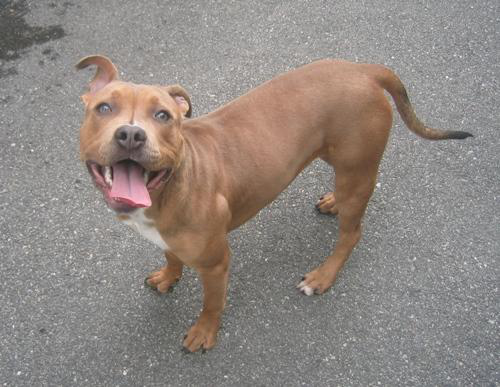

In [24]:
dog

In [25]:
dog.size

(500, 387)

In [26]:
dog.getpixel((0,0)) # 0 -- 255

(90, 95, 98)

In [29]:
# transform the pixel to tensor
transform = transforms.Compose([transforms.ToTensor()]) #

im = transform(dog)
print(type(im))
print(im.shape) #3-channels

<class 'torch.Tensor'>
torch.Size([3, 387, 500])


In [31]:
#plt.imshow(im) -> invalid dimensions error
# need 387,500,3 instead of 3,387,500
# reshape order 1,2,0
np.transpose(im.numpy(),(1,2,0))

array([[[0.3529412 , 0.37254903, 0.38431373],
        [0.34509805, 0.3647059 , 0.3764706 ],
        [0.3372549 , 0.35686275, 0.36862746],
        ...,
        [0.5686275 , 0.57254905, 0.5882353 ],
        [0.53333336, 0.5372549 , 0.5529412 ],
        [0.52156866, 0.5254902 , 0.5411765 ]],

       [[0.3254902 , 0.34509805, 0.35686275],
        [0.34117648, 0.36078432, 0.37254903],
        [0.33333334, 0.3529412 , 0.3647059 ],
        ...,
        [0.5764706 , 0.5803922 , 0.59607846],
        [0.54509807, 0.54901963, 0.5647059 ],
        [0.5294118 , 0.53333336, 0.54901963]],

       [[0.28627452, 0.30588236, 0.31764707],
        [0.32156864, 0.34117648, 0.3529412 ],
        [0.3372549 , 0.35686275, 0.36862746],
        ...,
        [0.5529412 , 0.5568628 , 0.57254905],
        [0.5254902 , 0.5294118 , 0.54509807],
        [0.49803922, 0.5019608 , 0.5176471 ]],

       ...,

       [[0.5764706 , 0.56078434, 0.5647059 ],
        [0.54509807, 0.5294118 , 0.53333336],
        [0.48235294, 0

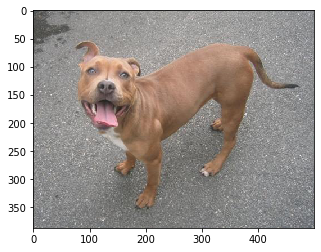

In [32]:
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

In [33]:
im.shape

torch.Size([3, 387, 500])

In [34]:
im[:,0,0]

tensor([0.3529, 0.3725, 0.3843])

In [35]:
# values change from pixel to tensor by dividing 255 in dog.getpixel((0,0)) 
# NORMALIZATION is automatically done in pytorch -> [0,1]
np.array((90,95,98))/255

array([0.35294118, 0.37254902, 0.38431373])

torch.Size([3, 224, 224])


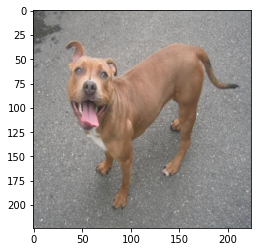

In [38]:
# (1) RESIZE an image
transform = transforms.Compose([
    #transforms.Resize(224), #just affecting the smaller edge
    transforms.Resize((224,224)),# resize with a particular size
    #transforms.Resize((1000,1000)),#stretch an image
    transforms.ToTensor()
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

torch.Size([3, 250, 250])


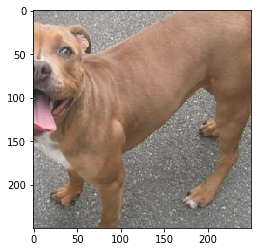

In [39]:
# (2) CENTERING 
transform = transforms.Compose([
    transforms.CenterCrop(250),
    transforms.ToTensor()
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

torch.Size([3, 250, 250])


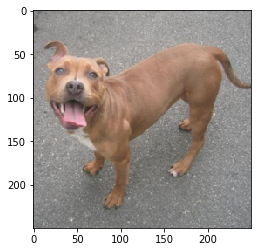

In [40]:
# (3) usually we do RESIZING & CENTERING 
transform = transforms.Compose([
    transforms.Resize(250),
    transforms.CenterCrop(250),
    transforms.ToTensor()
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

torch.Size([3, 387, 500])


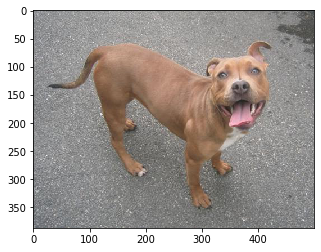

In [41]:
# (4) FLIP-1
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1), #p for probability
    transforms.ToTensor()
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))

torch.Size([3, 387, 500])


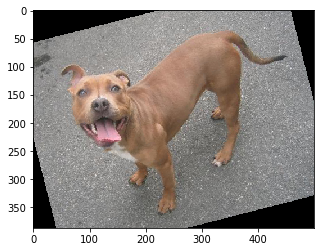

In [46]:
# (5) FLIP-2
transform = transforms.Compose([
    transforms.RandomRotation(degrees=30), #p for probability
    transforms.ToTensor()
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))

torch.Size([3, 224, 224])


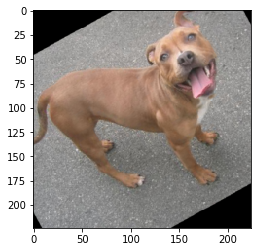

In [47]:
# 1-5
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),  # normally we'd set p=0.5
    transforms.RandomRotation(30),
    transforms.Resize(224),
    transforms.CenterCrop(224), 
    transforms.ToTensor()
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [ ]:
# pre-trained embedding has its own normalization values!!!!!!

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 387, 500])


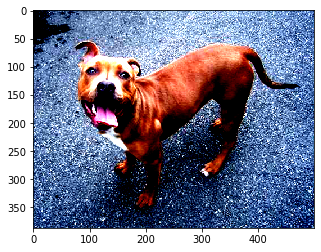

In [48]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])
    #std comes from the data from std and mean
])

im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

Recall that before normalization, the upper-leftmost tensor had pixel values of <tt>[0.3529, 0.3725, 0.3843]</tt>.<br>
With normalization we subtract the channel mean from the input channel, then divide by the channel std.<br><br>
$\frac{(0.3529-0.485)}{0.229}=-0.5767\quad\frac{(0.3725-0.456)}{0.224}=-0.3725\quad\frac{(0.3843-0.406)}{0.225}=-0.0964$<br>

In [49]:
# After normalization:
im[:,0,0]

tensor([-0.5767, -0.3725, -0.0964])

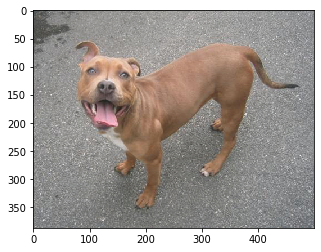

In [50]:
#(6) DENORMALIZATION
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)
im_inv = inv_normalize(im)
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im_inv.numpy(), (1, 2, 0)));